In [22]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

cut_lens = [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 30, 35, 40, 50, 60, 70, 80, 90, 100, 110, 120]
test_cut_lens = [7]
desired_shift = 3
max_shift = desired_shift * 2

test_metadata_hypdists_depthskm = np.load('/home/sdybing/mlaapde/test_metadata_hypdists_depthskm.npy', allow_pickle = True)
depth_km = test_metadata_hypdists[:,7]
print(depth_km.shape)

float_depth = depth_km.astype(float)
round_depth = np.around(float_depth)
print(depth_km)
print(round_depth)

(324365,)
[10.0 10.0 10.0 ... 77.7 77.7 77.7]
[10. 10. 10. ... 78. 78. 78.]


In [23]:
print(max(round_depth))

656.0


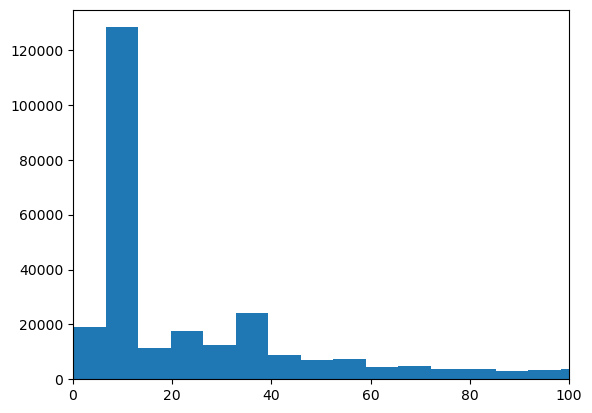

In [34]:
plt.hist(round_depth, bins = 100)
plt.xlim(0,100);

In [37]:
for cut_len in cut_lens:
    
    shift_len = cut_len - max_shift
    print(shift_len)
    errors = np.loadtxt('/home/sdybing/mlaapde/testdata_preds/mlaa_only/test_errors_' + str(shift_len) + 's_window.txt')
    
    # Full range boxplot
    
    bins = np.arange(0,660,10)
    # print(bins)
    data_bins = []

    for abin in bins:
    #     print(abin)
        i = np.where(round_depth == abin)[0]
    #     print(measured_mags[i])
        error_bin = np.array(errors[i])
    #     print(predict_bin)
        data_bins.append(error_bin)
    #     print('-----')

    fig = plt.figure(figsize = (14, 9), dpi = 300, facecolor = 'white')

    plt.rcParams['text.usetex'] = False

    fig.suptitle('Magnitude prediction error by source depth (km) - ' + str(shift_len) + 's window', fontsize = 20, y = 0.93, color = 'black')
    ax = fig.add_subplot(111)
    ax.set_facecolor('white')
    ax.grid(which = 'major', axis = 'y', markevery = 0.5, zorder = 2)
    ax.grid(which = 'major', axis = 'x', zorder = 2.5)

    bp = ax.boxplot(data_bins, notch = False, patch_artist = True, zorder = 3)

    for patch in bp['boxes']:
        patch.set_facecolor('#2DADB4')
        patch.set_edgecolor('#001528')
    for median in bp['medians']:
        median.set(color = '#001528', linewidth = 3)
    for whisker in bp['whiskers']:
        whisker.set(color = '#001528', linewidth = 1)
    for cap in bp['caps']:
        cap.set(color = '#001528', linewidth = 1)
    for flier in bp['fliers']:
        flier.set(marker = '+', color = '#001528', alpha = 0.5)

    bins_list = bins.tolist()
    ax.set_xticklabels(bins_list, fontsize = 14, color = 'black')
    ax.xaxis.set_major_locator(ticker.FixedLocator([1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101]))
    ax.axhline(0, color = 'gray', linestyle = '--', linewidth = 2, alpha = 0.8, zorder = 2)
    ax.tick_params(labelsize = 14, color = 'black')
    ax.set_ylabel('Magnitude error (predicted - catalog)', fontsize = 16, color = 'black')
    ax.set_xlabel('Source depth (km)', fontsize = 16, color = 'black')
    ax.set_ylim(-5,5)

#     plt.show();
    plt.savefig('/home/sdybing/mlaapde/testdata_preds/mlaa_only/depth_error_full_' + str(shift_len) + 's_window_BOXPLOT.png', format = 'PNG', facecolor = 'white', transparent = False)
    plt.close();
    
    # 0-50 km depth boxplot only
    
    bins = np.arange(0,50,1)
    # print(bins)
    data_bins = []

    for abin in bins:
    #     print(abin)
        i = np.where(round_depth == abin)[0]
    #     print(measured_mags[i])
        error_bin = np.array(errors[i])
    #     print(predict_bin)
        data_bins.append(error_bin)
    #     print('-----')

    fig = plt.figure(figsize = (14, 9), dpi = 300, facecolor = 'white')

    plt.rcParams['text.usetex'] = False

    fig.suptitle('Magnitude prediction error by source depth (km) - Shallow events - ' + str(shift_len) + 's window', fontsize = 20, y = 0.93, color = 'black')
    ax = fig.add_subplot(111)
    ax.set_facecolor('white')
    ax.grid(which = 'major', axis = 'y', markevery = 0.5, zorder = 2)
    ax.grid(which = 'major', axis = 'x', zorder = 2.5)

    bp = ax.boxplot(data_bins, notch = False, patch_artist = True, zorder = 3)

    for patch in bp['boxes']:
        patch.set_facecolor('#2DADB4')
        patch.set_edgecolor('#001528')
    for median in bp['medians']:
        median.set(color = '#001528', linewidth = 3)
    for whisker in bp['whiskers']:
        whisker.set(color = '#001528', linewidth = 1)
    for cap in bp['caps']:
        cap.set(color = '#001528', linewidth = 1)
    for flier in bp['fliers']:
        flier.set(marker = '+', color = '#001528', alpha = 0.5)

    bins_list = bins.tolist()
    ax.set_xticklabels(bins_list, fontsize = 14, color = 'black')
    ax.xaxis.set_major_locator(ticker.FixedLocator([1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101]))
    ax.axhline(0, color = 'gray', linestyle = '--', linewidth = 2, alpha = 0.8, zorder = 2)
    ax.tick_params(labelsize = 14, color = 'black')
    ax.set_ylabel('Magnitude error (predicted - catalog)', fontsize = 16, color = 'black')
    ax.set_xlabel('Source depth (km)', fontsize = 16, color = 'black')
    ax.set_ylim(-5,5)

#     plt.show();
    plt.savefig('/home/sdybing/mlaapde/testdata_preds/mlaa_only/depth_error_50km_' + str(shift_len) + 's_window_BOXPLOT.png', format = 'PNG', facecolor = 'white', transparent = False)
    plt.close();

1
2
3
4
5
6
7
8
9
10
11
12
13
14
19
24
29
34
44
54
64
74
84
94
104
114


In [38]:
# # Scatter plots

# errors = np.loadtxt('/home/sdybing/mlaapde/testdata_preds/mlaa_only/test_errors_114s_window.txt')

# fig = plt.figure(figsize = (14, 9), dpi = 300, facecolor = 'white')
# plt.title('Magnitude prediction error by source depth (km) - 114s window', fontsize = 21, pad = 12)
# plt.scatter(round_depth, errors, alpha = 0.2, color = '#2DADB4')
# plt.xlabel('Source depth (km)', fontsize = 18)
# plt.ylabel('Magnitude error (predicted - catalog)', fontsize = 18)
# plt.xlim(min(round_depth), max(round_depth))
# plt.axhline(0, color = 'black', linestyle = '--')
# plt.tick_params(axis='both', labelsize = 16)
# plt.show()
# # plt.savefig('/home/sdybing/mlaapde/testdata_preds/mlaa_only/depth_error_114s_window.png', format = 'PNG', facecolor = 'white', transparent = False)
# plt.close();

In [39]:
max(round_depth)

656.0